
# Project Name : Hepatitis C Prediction

## **Dataset Description**

In [10]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("fedesoriano/hepatitis-c-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'hepatitis-c-dataset' dataset.
Path to dataset files: /kaggle/input/hepatitis-c-dataset


In [11]:
import os

# List all files in the dataset directory
for file in os.listdir(path):
    print(file)


HepatitisCdata.csv
.nfs000000007c19fdd700000002


In [12]:
import pandas as pd

# Load the CSV into a DataFrame
df = pd.read_csv(os.path.join(path, "HepatitisCdata.csv"))

# Preview the dataset
print(df.head())

# Describe statistics
df.describe().T  # remove NaN

   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,615.0,308.000000,177.679487,1.00,154.500,308.00,461.500,615.00
Age,615.0,47.408130,10.055105,19.00,39.000,47.00,54.000,77.00
ALB,614.0,41.620195,5.780629,14.90,38.800,41.95,45.200,82.20
ALP,597.0,68.283920,26.028315,11.30,52.500,66.20,80.100,416.60
ALT,614.0,28.450814,25.469689,0.90,16.400,23.00,33.075,325.30
AST,615.0,34.786341,33.090690,10.60,21.600,25.90,32.900,324.00
BIL,615.0,11.396748,19.673150,0.80,5.300,7.30,11.200,254.00
CHE,615.0,8.196634,2.205657,1.42,6.935,8.26,9.590,16.41
CHOL,605.0,5.368099,1.132728,1.43,4.610,5.30,6.060,9.67
CREA,615.0,81.287805,49.756166,8.00,67.000,77.00,88.000,1079.10


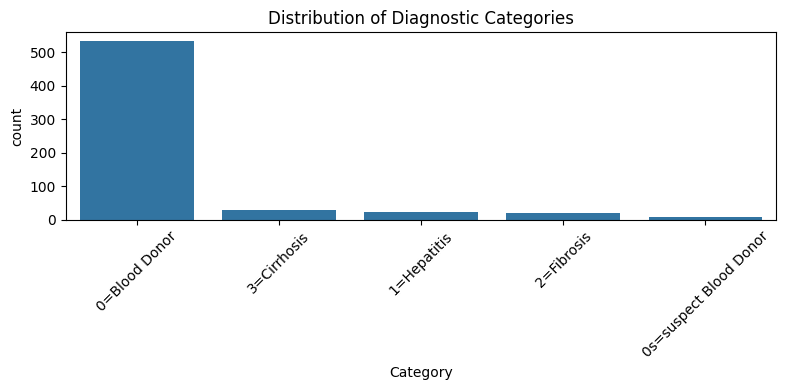

(615, 14)

In [13]:
# Required imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and already loaded (you can use pd.read_csv if needed)
# Example: df = pd.read_csv('your_dataset.csv')

# Plot category distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title("Distribution of Diagnostic Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#displays shape of the dataset
df.shape #615 rows, 13 columns


# EDA (Exploratory Data Analysis)

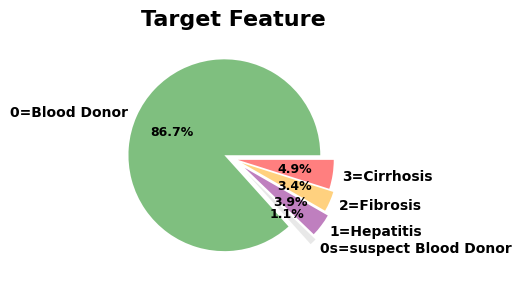

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: Assuming 'data' is already loaded with a 'Category' column
# data = pd.read_csv('your_dataset.csv')

# Group data by Category
category_counts = df.groupby('Category').Category.count()

# Smaller figure size
fig, ax = plt.subplots(figsize=(5, 5))  # reduced from (8, 8)

# Adjust explode and colors to match the number of categories
explode = [0.1, 0.2, 0.15, 0.1, 0.05][:len(category_counts)]  # dynamic sizing
colors = ['green', 'lightgrey', 'purple', 'orange', 'red'][:len(category_counts)]

# Plot the pie chart
pie_slices, texts, autotexts = ax.pie(
    category_counts.values,
    labels=category_counts.index,
    autopct='%1.1f%%',
    explode=explode,
    colors=colors
)

# Set transparency
for slice in pie_slices:
    slice.set_alpha(0.5)

# Set label styles
for text in texts:
    text.set_weight('bold')
    text.set_size(10)  # reduced font size

for autotext in autotexts:
    autotext.set_weight('bold')
    autotext.set_size(9)  # reduced font size

# Title (optional)
ax.set_title('Target Feature', fontsize=16, fontweight='bold', pad=10)

# Show the plot
plt.tight_layout()
plt.show()


In [15]:
# Count of missing values per column
print(df.isna().sum())

# Percentage of missing values per column
missing_percentage = df.isna().mean() * 100
print(missing_percentage)





Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64
Unnamed: 0    0.000000
Category      0.000000
Age           0.000000
Sex           0.000000
ALB           0.162602
ALP           2.926829
ALT           0.162602
AST           0.000000
BIL           0.000000
CHE           0.000000
CHOL          1.626016
CREA          0.000000
GGT           0.000000
PROT          0.162602
dtype: float64


In [16]:
# Step 3: Drop rows with missing values
df_clean = df.dropna()

# **  Univariate Analysis Workflow **

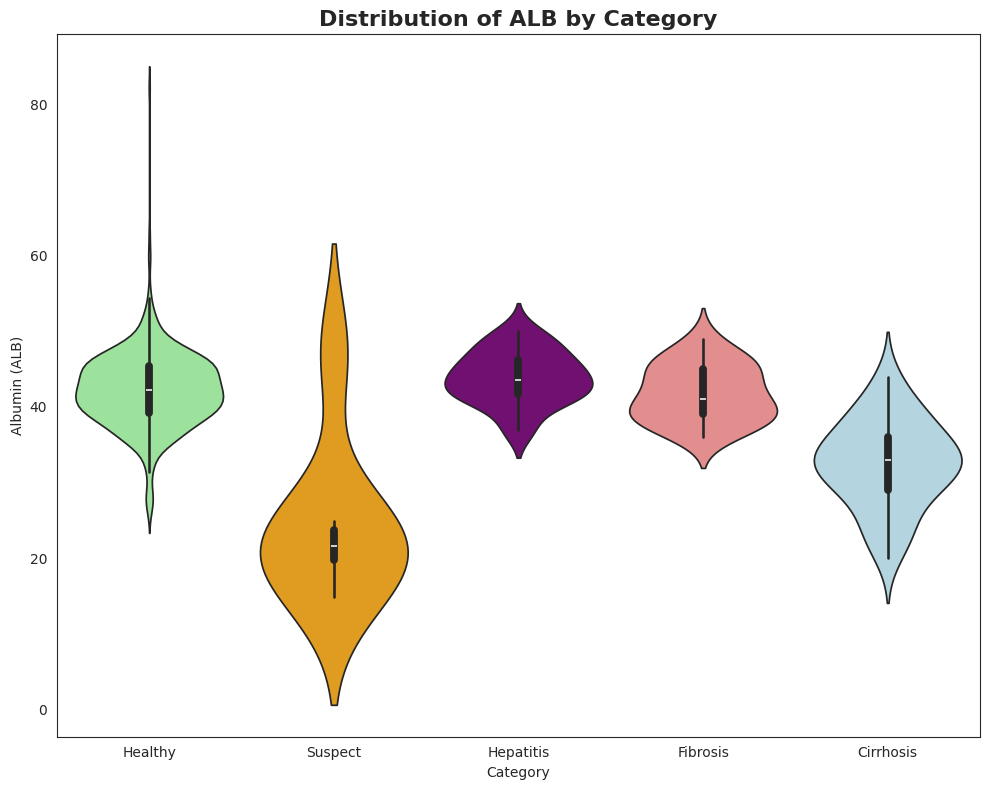

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Clean up the 'Category' column for clearer labels
df['Category'] = df['Category'].replace({
    '0=Blood Donor': 'Healthy',
    '0s=suspect Blood Donor': 'Suspect',
    '1=Hepatitis': 'Hepatitis',
    '2=Fibrosis': 'Fibrosis',
    '3=Cirrhosis': 'Cirrhosis'
})

# 2. Build a palette that matches the cleaned labels
category_colors = {
    'Healthy':     'lightgreen',
    'Cirrhosis':   'lightblue',
    'Fibrosis':    'lightcoral',
    'Hepatitis':   'purple',
    'Suspect':     'orange'
}

# 3. Plot
plt.figure(figsize=(10, 8))
sns.set_style('white')

sns.violinplot(
    x='Category',
    y='ALB',
    hue='Category',
    data=df,
    palette=category_colors,
    legend=False
)

plt.title('Distribution of ALB by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Albumin (ALB)')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1614834499.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Category'], y=df['AST'],palette='Reds')


<Axes: xlabel='Category', ylabel='AST'>

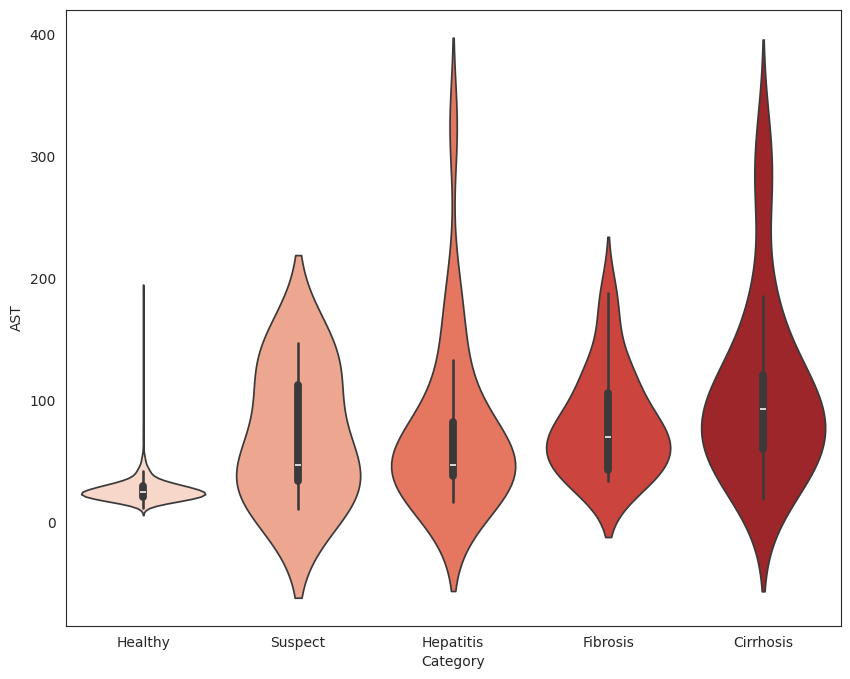

In [18]:
# Create violinplot:
plt.figure(figsize=(10, 8))
sns.set_style('white')
sns.violinplot(x=df['Category'], y=df['AST'],palette='Reds')

/tmp/ipython-input-347276989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Category'], y=df['ALT'],palette='Greens')


<Axes: xlabel='Category', ylabel='ALT'>

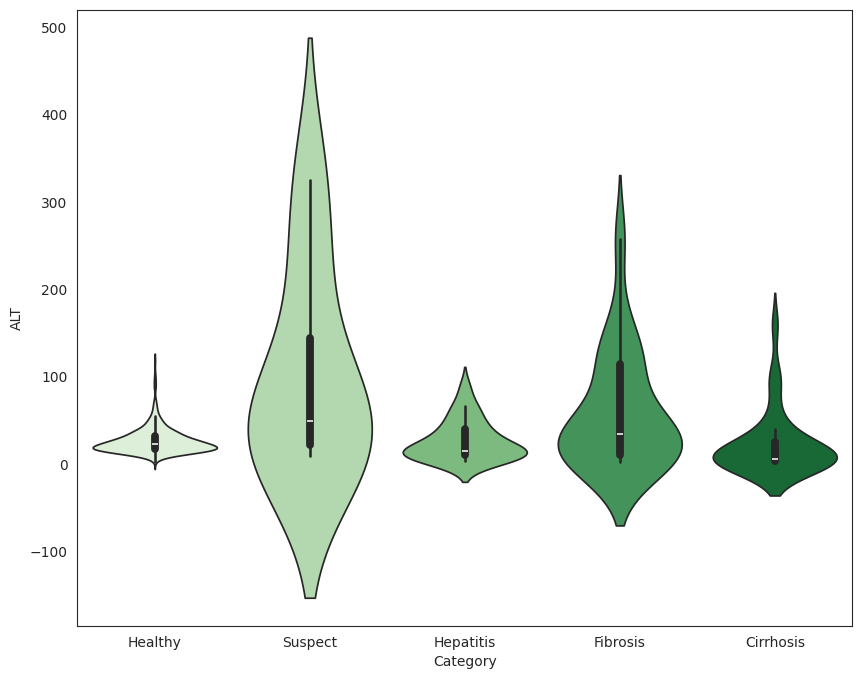

In [19]:
# Create violinplot:
plt.figure(figsize=(10, 8))
sns.set_style('white')
sns.violinplot(x=df['Category'], y=df['ALT'],palette='Greens')

/tmp/ipython-input-3729214441.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Category'], y=df['BIL'],palette='Blues')


<Axes: xlabel='Category', ylabel='BIL'>

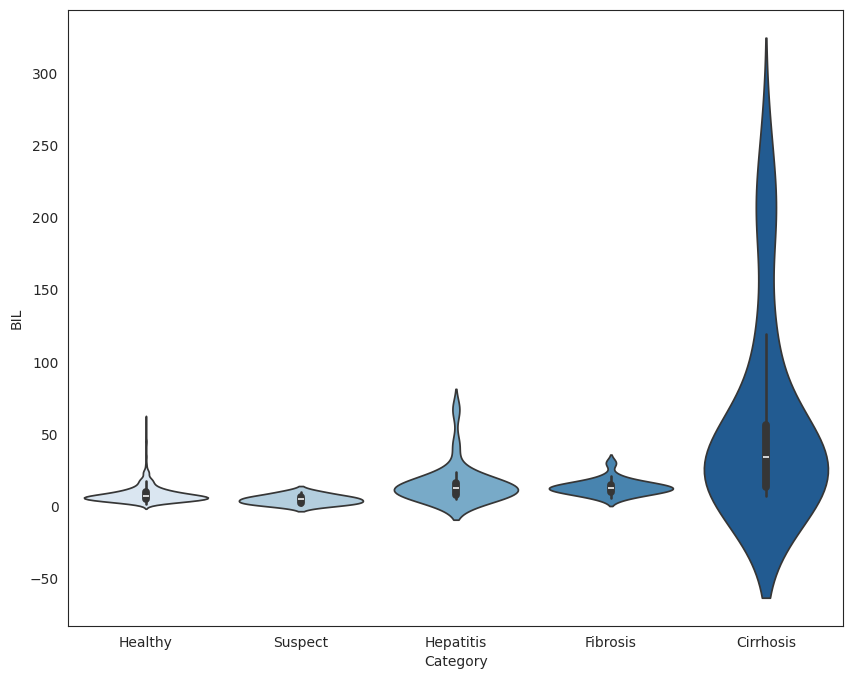

In [20]:
plt.figure(figsize=(10,8))
sns.set_style('white')
sns.violinplot(x=df['Category'], y=df['BIL'],palette='Blues')


/tmp/ipython-input-1960674766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['BIL'],color='Red', kde=True)


<Axes: xlabel='BIL', ylabel='Density'>

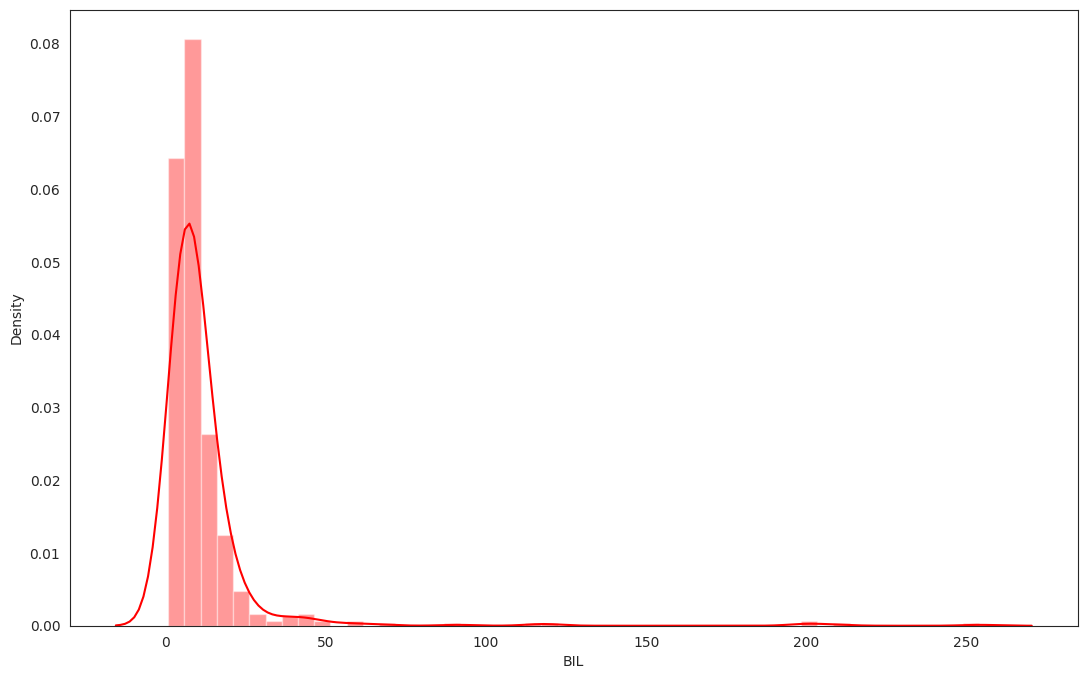

In [21]:
# Create a histogram:
# Change the style of the figure to the "white" theme
sns.set_style("white")
plt.figure(figsize=(13, 8))
sns.distplot(a=df['BIL'],color='Red', kde=True)

/tmp/ipython-input-2440142993.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a= df['ALB'], kde=True)


<Axes: xlabel='ALB', ylabel='Density'>

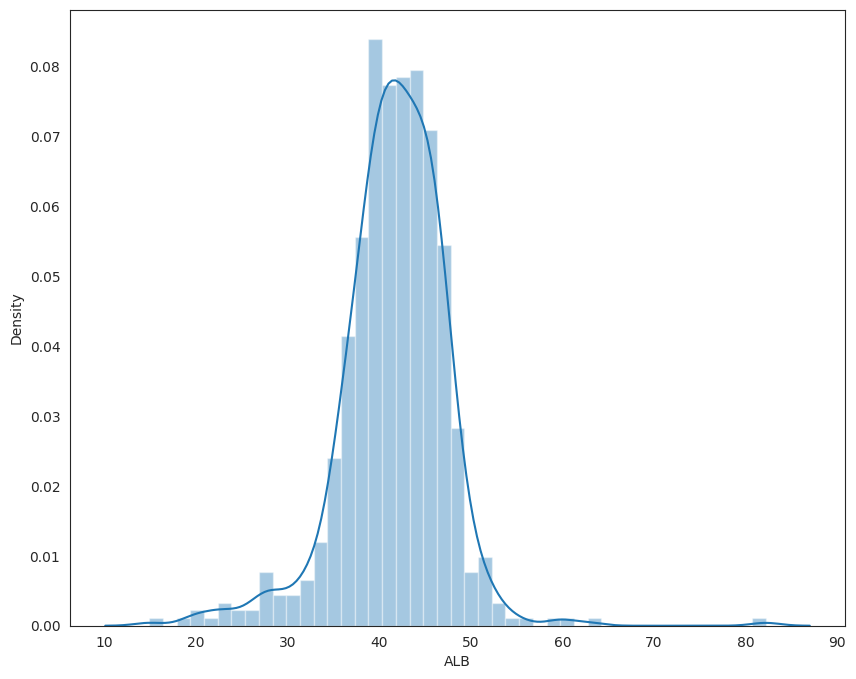

In [22]:
sns.set_style('white')
plt.figure(figsize=(10, 8))
sns.distplot(a= df['ALB'], kde=True)

/tmp/ipython-input-2726626269.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['AST'], shade=True, color='Red')


<Axes: xlabel='AST', ylabel='Density'>

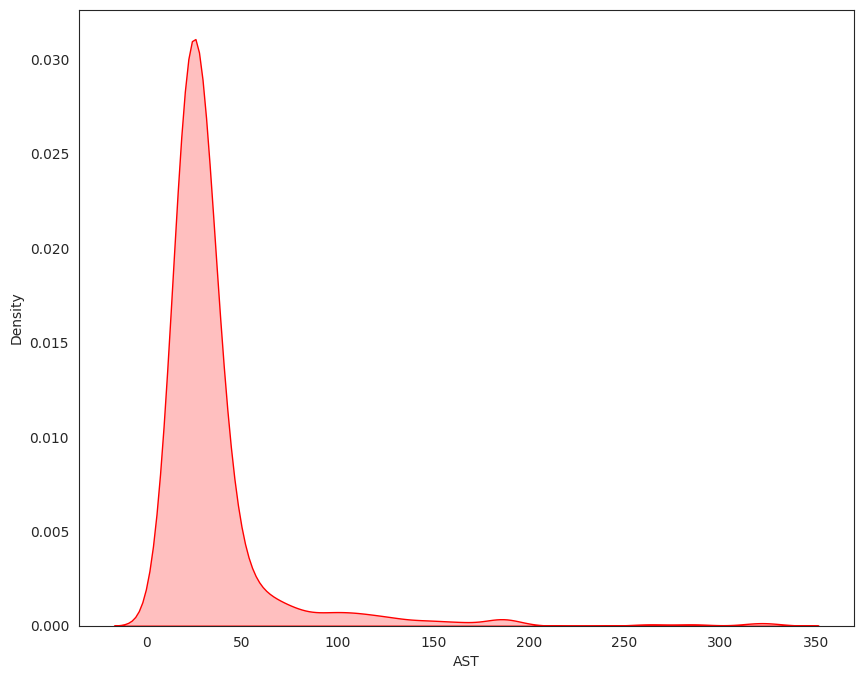

In [23]:
sns.set_style('white')
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df['AST'], shade=True, color='Red')

# Relationships & Correlation Plots:-

<Axes: xlabel='ALB', ylabel='BIL'>

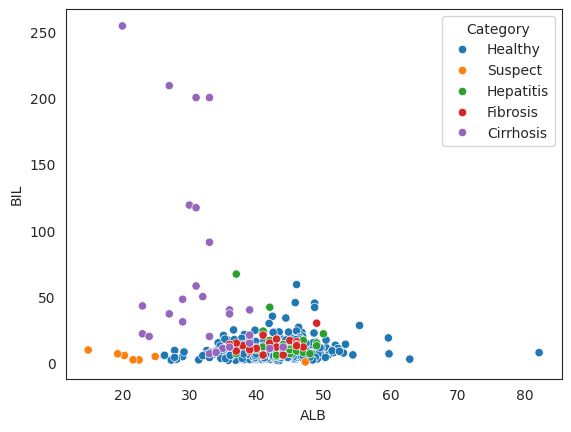

In [24]:
# Scatterplots:
sns.scatterplot(x=df['ALB'], y=df['BIL'], hue=df['Category'])

<Axes: xlabel='ALT', ylabel='AST'>

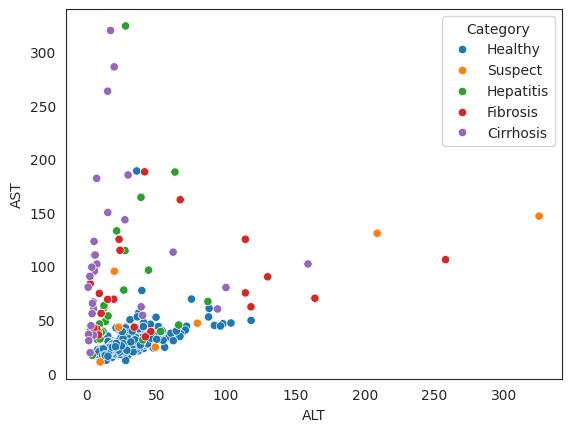

In [25]:
sns.scatterplot(x=df['ALT'], y=df['AST'], hue=df['Category'])

<Axes: xlabel='ALP', ylabel='AST'>

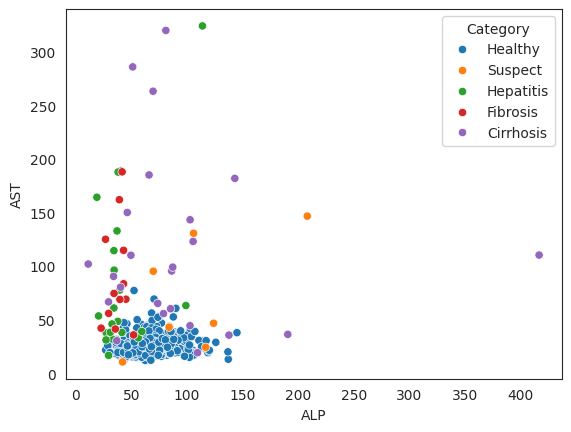

In [26]:
sns.scatterplot(x=df['ALP'], y=df['AST'], hue=df['Category'])

<Axes: xlabel='ALB', ylabel='ALT'>

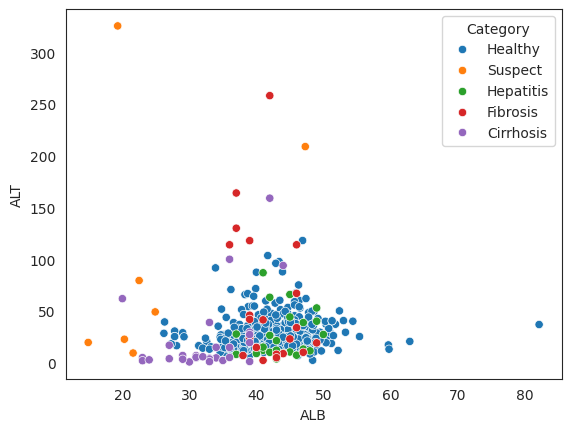

In [27]:
sns.scatterplot(x=df['ALB'], y=df['ALT'], hue=df['Category'])

**Starting with Binary **

In [28]:


df_uniques = df.nunique()
# Count number of distinct elements in specified axis.
#Return Series with number of distinct elements. Can ignore NaN values.
df_uniques

,0
Unnamed: 0,615
Category,5
Age,49
Sex,2
ALB,189
ALP,414
ALT,341
AST,297
BIL,188
CHE,407


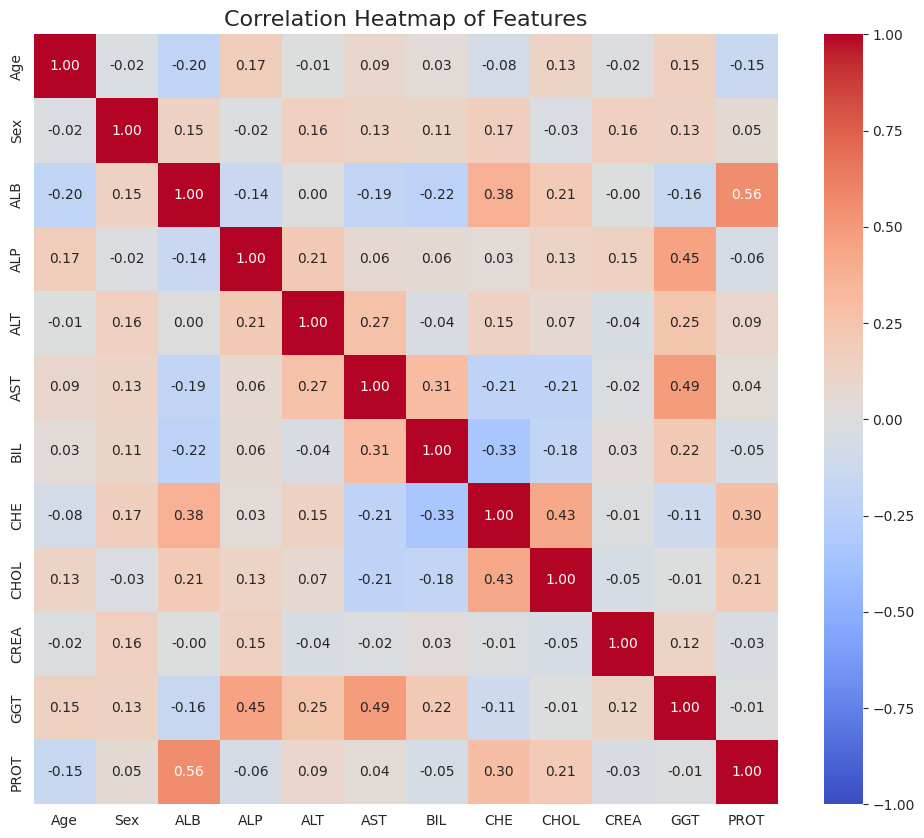

In [29]:
# Step 1: Drop non-numeric or irrelevant columns
X_clean = df.drop(columns=['Unnamed: 0', 'Category'])  # Drop target and index-like columns

# Step 2: Convert categorical column(s) to numeric if needed
if X_clean['Sex'].dtype == 'object':
    X_clean['Sex'] = X_clean['Sex'].map({'m': 1, 'f': 0})  # convert Sex

# Step 3: Check for remaining non-numeric columns and drop them
X_clean = X_clean.select_dtypes(include=['number'])  # only keep numeric columns

# Step 4: Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X_clean.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()


# Balance Dataset with SMOTE

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Step 1: Convert 'Sex' column into binary values (m=1, f=0)
df['Sex'] = df['Sex'].map({'m': 1, 'f': 0})

# Step 2: Separate features and target
X = df.drop(columns=['Category'])
y = df['Category']

# Step 3: Encode target categories to float (including 'Suspect')
label_map = {
    'Healthy': 0.0,
    'Hepatitis': 1.0,
    'Fibrosis': 2.0,
    'Cirrhosis': 3.0,
    'Suspect': 4.0
}
y_float = y.map(label_map).astype('float64')

# Confirm mapping was successful
assert y_float.isnull().sum() == 0, "Some target values were not mapped!"

# Step 4: Split into training, validation, and test sets (70% train, 15% val, 15% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_float, test_size=0.3, random_state=8)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=8)

# Step 5: Impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# Optional: Check class distribution before SMOTE
print("Before SMOTE:\n", pd.Series(y_train).value_counts())

# Step 6: Apply SMOTE to balance training set (with safe k_neighbors)
sm = SMOTE(random_state=8, k_neighbors=1)
X_bal, y_bal = sm.fit_resample(X_train, y_train)

# Optional: Check class distribution after SMOTE
print("\nAfter SMOTE:\n", pd.Series(y_bal).value_counts())



Before SMOTE:
 Category
0.0    368
3.0     23
1.0     19
2.0     16
4.0      4
Name: count, dtype: int64

After SMOTE:
 Category
2.0    368
0.0    368
4.0    368
3.0    368
1.0    368
Name: count, dtype: int64


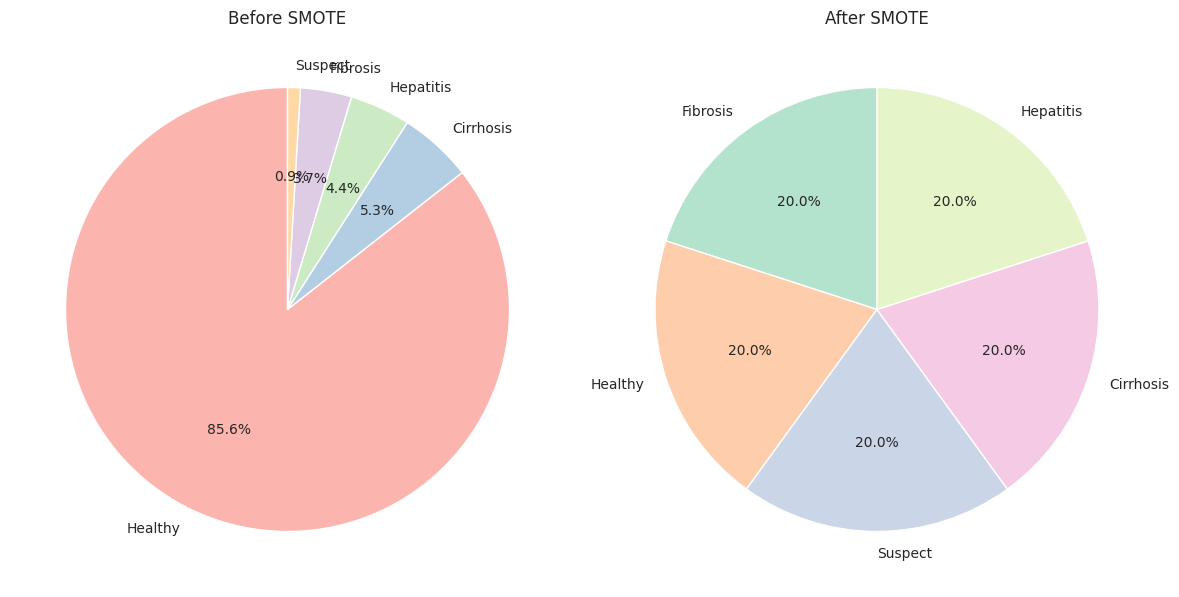

In [31]:
import matplotlib.pyplot as plt

# Create label names for the classes
label_names = {
    0.0: 'Healthy',
    1.0: 'Hepatitis',
    2.0: 'Fibrosis',
    3.0: 'Cirrhosis',
    4.0: 'Suspect'
}

# Convert labels to readable names
y_train_named = pd.Series(y_train).map(label_names)
y_bal_named = pd.Series(y_bal).map(label_names)

# Plotting side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart before SMOTE
y_train_named.value_counts().plot.pie(
    autopct='%1.1f%%',
    ax=axes[0],
    startangle=90,
    colors=plt.cm.Pastel1.colors
)
axes[0].set_title('Before SMOTE')
axes[0].set_ylabel('')

# Pie chart after SMOTE
y_bal_named.value_counts().plot.pie(
    autopct='%1.1f%%',
    ax=axes[1],
    startangle=90,
    colors=plt.cm.Pastel2.colors
)
axes[1].set_title('After SMOTE')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


# Data Preprocessing And Feature Scaling:



# Hyperparameter Tuning Using Grid Search

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import joblib

# 1) Build a pipeline: scaler → logistic regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=8))
])

# 2) Hyperparameter grid: tune C and multiclass strategy
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__multi_class': ['ovr', 'multinomial'],  # compare both
    'clf__penalty': ['l2']
}

# 3) Grid search with 5‑fold CV on the SMOTE’d training set
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_bal, y_bal)

# Best hyperparameters after grid search
print("Best hyperparameters:", grid.best_params_)

# 4) Validation set evaluation
y_val_pred = grid.predict(X_val)

# Accuracy and F1 Score on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred, average='weighted')

print("\nValidation Set Performance")
print(f"Accuracy: {accuracy_val * 100:.2f}%")
print(f"F1 Score (weighted): {f1_val:.2f}")

# 5) Test-set evaluation
y_test_pred = grid.predict(X_test)

# Accuracy and F1 Score on test set
accuracy_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print("\nTest Set Performance")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"F1 Score (weighted): {f1_test:.2f}")

# 6) Save the final pipeline
joblib.dump(grid.best_estimator_, 'liver_disease_logreg_5class.pkl')


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best hyperparameters: {'clf__C': 100, 'clf__multi_class': 'multinomial', 'clf__penalty': 'l2'}

Validation Set Performance
Accuracy: 96.74%
F1 Score (weighted): 0.97

Test Set Performance
Accuracy: 96.77%
F1 Score (weighted): 0.97


['liver_disease_logreg_5class.pkl']

In [36]:
!git clone https://github.com/pabhor/Hepatitis-C-Prediction.git

fatal: destination path 'Hepatitis-C-Prediction' already exists and is not an empty directory.


In [37]:
!ls -la /content

total 24
drwxr-xr-x 1 root root 4096 Feb 24 04:22 .
drwxr-xr-x 1 root root 4096 Feb 24 04:06 ..
drwxr-xr-x 4 root root 4096 Jan 16 14:24 .config
drwxr-xr-x 3 root root 4096 Feb 24 04:22 Hepatitis-C-Prediction
-rw-r--r-- 1 root root 2225 Feb 24 04:08 liver_disease_logreg_5class.pkl
drwxr-xr-x 1 root root 4096 Jan 16 14:24 sample_data
